# Figure box-plot metrics

La idea es generar boxplot the las matricas de cada modelo al testear sobre distintos datasets.
Tambien generar una matris que nos muetre la comparacion entre modelos y testeo

A partir de las imagenes de segmentacion guardadas en la ruta *ODOC_segmentation/predicted* donde tengo la segmentacion del disco y la copa por separado con el mismo nombre de la imagen. separado pro datasets


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import glob
import ntpath
import pandas as pd
import imageio as io
import numpy as np
from PIL import Image
from skimage.transform import resize
from skimage import filters, measure

# MODEL D

In [3]:
csv_drishti = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelD/MODELD_DRISHTI_SEGM.csv'
csv_rimone = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelD/MODELD_RIMONE_SEGM.csv'
csv_refuge = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelD/MODELD_REFUGE_SEGM.csv'
csv_origa = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelD/MODELD_ORIGA_SEGM.csv'

df_drishti = pd.read_csv(csv_drishti,index_col=0,delimiter=',')
df_rimone = pd.read_csv(csv_rimone,index_col=0,delimiter=',')
df_refuge = pd.read_csv(csv_refuge,index_col=0,delimiter=',')
df_origa = pd.read_csv(csv_origa,index_col=0,delimiter=',')


In [4]:
df_drishti.mean()
df_drishti.shape
r,c = df_drishti.shape
name = []
for i in range(r):
    name.append('DRISHTI')

r,c = df_refuge.shape
name_r = []
for i in range(r):
    name_r.append('REFUGE')

r,c = df_rimone.shape
name_r3 = []
for i in range(r):
    name_r3.append('RIM ONE')

r,c = df_origa.shape
name_o = []
for i in range(r):
    name_o.append('ORIGA')



In [186]:
df_origa.fillna(0, inplace=True)
df_origa['Hausdorff_distance_OC'] = pd.to_numeric(df_origa['Hausdorff_distance_OC'],errors='coerce')
df_origa['Hausdorff_distance_OD'] = pd.to_numeric(df_origa['Hausdorff_distance_OD'],errors='coerce')
df_origa['Hausdorff_distance_ODint'] = pd.to_numeric(df_origa['Hausdorff_distance_ODint'],errors='coerce')

df_origa['DICE OC'] = pd.to_numeric(df_origa['DICE OC'],errors='coerce')
df_origa['DICE OD'] = pd.to_numeric(df_origa['DICE OD'],errors='coerce')
df_origa['DICE ODint'] = pd.to_numeric(df_origa['DICE ODint'],errors='coerce')

print(type(df_origa['Hausdorff_distance_OC'][0]))



<class 'numpy.float64'>


In [5]:
df_drishti = df_drishti.assign(dataset=name)
df_refuge =df_refuge.assign(dataset=name_r)
df_rimone =df_rimone.assign(dataset=name_r3)
df_origa =df_origa.assign(dataset=name_o)





In [182]:
df_origa

,DICE OC,DICE OD,DICE ODint,DICE AVG,PRECISION OC,PRECISION OD,PRECISION ODint,RECALL OC,RECALL OD,RECALL ODint,Hausdorff_distance_OC,Hausdorff_distance_OD,Hausdorff_distance_ODint,dataset
NOMBRE,,,,,,,,,,,,,,
ORIGA001.png,0.9465298247566906,0.9814517286129569,0.9661647371884732,0.9639907766848237,0.9412468422363341,0.9798289305113694,0.9695862648353766,0.9519438826870539,0.9830860730592041,0.9627950604429735,42.059482,14.422205,32.000000,ORIGA
ORIGA002.png,0.9560686486436137,0.9657690431868853,0.9579346948711102,0.9609188459152496,0.9508408752673675,0.9398678842354011,0.9838881498767531,0.961421723106128,0.9950790410377992,0.9347199942683384,23.194827,59.908263,42.190046,ORIGA
ORIGA003.png,0.4954663021819922,0.4950420025418631,0.8514997218586755,0.49525415236192766,0.4910140832265218,0.49018136660257977,0.9955078275003189,0.5,0.5,0.7737015063093398,0.000000,0.000000,89.005618,ORIGA
ORIGA004.png,0.832620935893418,0.9286453047417895,0.9377067613697958,0.8806331203176038,0.8005123658379472,0.8818172673012707,0.8958453394160353,0.8726286627261334,0.9892387325029863,0.9899445678287573,93.520051,105.948101,67.082039,ORIGA
ORIGA005.png,0.8557511875358276,0.9122056306417585,0.9885060368112716,0.883978409088793,0.797071205808886,0.8588457770654616,0.9872691899590267,0.9444390523828051,0.9855113601792742,0.9897494262589717,289.209267,155.051604,10.816654,ORIGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ORIGA646.png,0.9032524189323943,0.9507332391448537,0.9871154133555372,0.926992829038624,0.8396728287449173,0.9127857262867849,0.9754678481933925,0.99721949302697,0.9968644950619274,0.9993772386000341,58.215118,100.623059,12.649111,ORIGA
ORIGA647.png,0.9355702210732577,0.9679912568829756,0.9432190377163493,0.9517807389781167,0.9153793267899497,0.9466076033275993,0.9844007257799686,0.9578712842098576,0.9916207988929566,0.9086848390518578,25.079872,62.128898,51.788030,ORIGA
ORIGA648.png,0.7920874709302093,0.9681001472504402,0.9103533520516925,0.8800938090903248,0.877476329320841,0.9878134598802888,0.9974961187146694,0.7384199237258166,0.9499666346024997,0.8497742489436009,161.003106,32.015621,55.000000,ORIGA


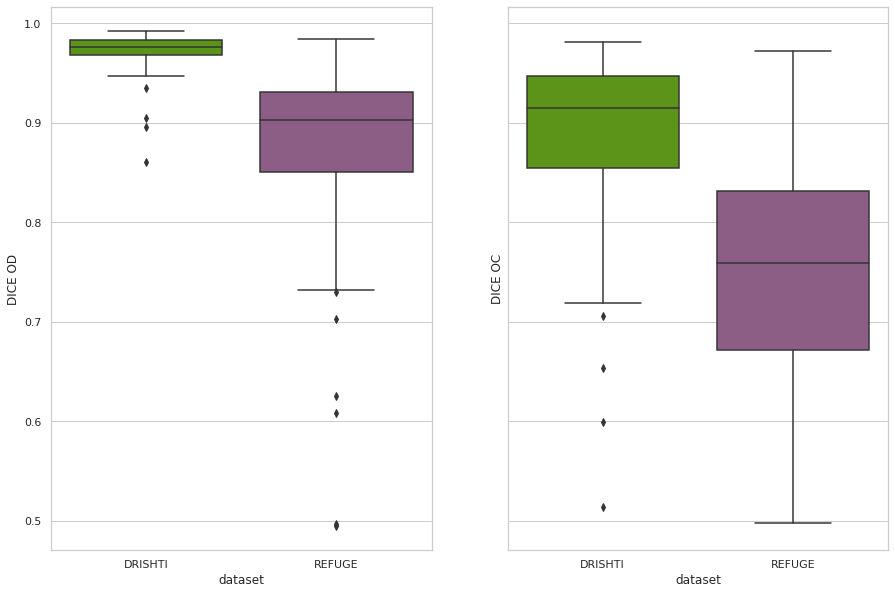

In [6]:
df_MODELD = pd.concat([df_drishti,df_refuge])
#df_MODELD = pd.concat([df_MODELD,df_rimone])
#df_MODELD = pd.concat([df_MODELD,df_origa])



pallete=[sns.xkcd_rgb["leaf green"],sns.xkcd_rgb['purplish'],sns.xkcd_rgb['magenta'],sns.xkcd_rgb["brick"]]
pallete_oc = [sns.xkcd_rgb['jade green'],sns.xkcd_rgb['muted purple'],sns.xkcd_rgb['dark magenta'],sns.xkcd_rgb["wine"]]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

sns.boxplot(x='dataset',y='DICE OD',data=df_MODELD, palette=pallete,ax=axes[0])
sns.boxplot(x='dataset',y='DICE OC',data=df_MODELD, palette=pallete, ax=axes[1])
plt.savefig('dice.jpg')


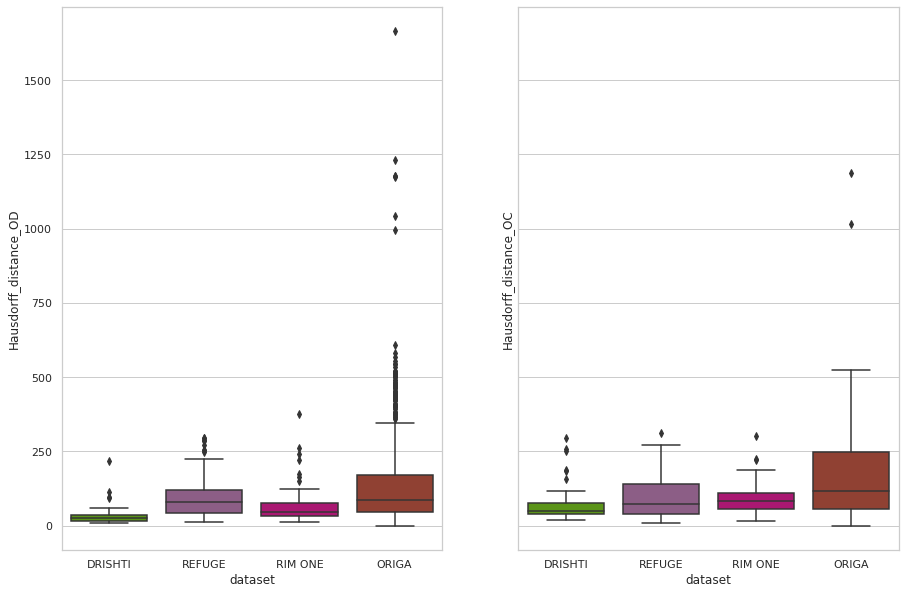

In [201]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

sns.boxplot(x='dataset',y='Hausdorff_distance_OD',data=df_MODELD, palette=pallete,ax=axes[0])
sns.boxplot(x='dataset',y='Hausdorff_distance_OC',data=df_MODELD, palette=pallete, ax=axes[1])
plt.savefig('Hausdorff_distance.jpg')

# modelR

In [16]:
csv_drishti = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelR/MODELR_DRISHTI_SEGM.csv'
csv_rimone = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelR/MODELR_RIMONE_SEGM.csv'
csv_refuge = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelR/MODELR_REFUGE_SEGM.csv'
csv_papila = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelR/MODELR_PAPILA_SEGM.csv'

df_drishti = pd.read_csv(csv_drishti,index_col=0,delimiter=',')
df_rimone = pd.read_csv(csv_rimone,index_col=0,delimiter=',')
df_refuge = pd.read_csv(csv_refuge,index_col=0,delimiter=',')
df_papila = pd.read_csv(csv_papila,index_col=0,delimiter=',')


In [17]:
r,c = df_drishti.shape
name = []
for i in range(r):
    name.append('DRISHTI')

r,c = df_refuge.shape
name_r = []
for i in range(r):
    name_r.append('REFUGE')

r,c = df_rimone.shape
name_r3 = []
for i in range(r):
    name_r3.append('RIM ONE')

r,c = df_papila.shape
name_p = []
for i in range(r):
    name_p.append('PAPILA')


In [18]:
df_drishti = df_drishti.assign(dataset=name)
df_refuge =df_refuge.assign(dataset=name_r)
df_rimone =df_rimone.assign(dataset=name_r3)
df_papila =df_papila.assign(dataset=name_p)


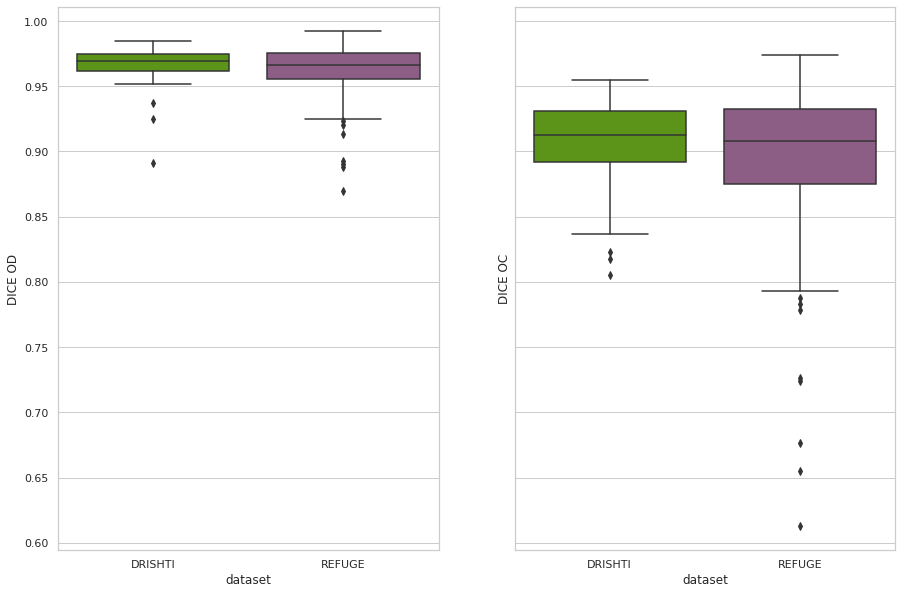

In [19]:
df_MODELR = pd.concat([df_drishti,df_refuge])
#df_MODELR = pd.concat([df_MODELR,df_rimone])
#df_MODELR = pd.concat([df_MODELR,df_papila])



pallete=[sns.xkcd_rgb["leaf green"],sns.xkcd_rgb['purplish'],sns.xkcd_rgb['magenta'],sns.xkcd_rgb["brick"]]
pallete_oc = [sns.xkcd_rgb['jade green'],sns.xkcd_rgb['muted purple'],sns.xkcd_rgb['dark magenta'],sns.xkcd_rgb["wine"]]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

sns.boxplot(x='dataset',y='DICE OD',data=df_MODELR, palette=pallete,ax=axes[0])
sns.boxplot(x='dataset',y='DICE OC',data=df_MODELR, palette=pallete, ax=axes[1])
plt.savefig('dice.jpg')

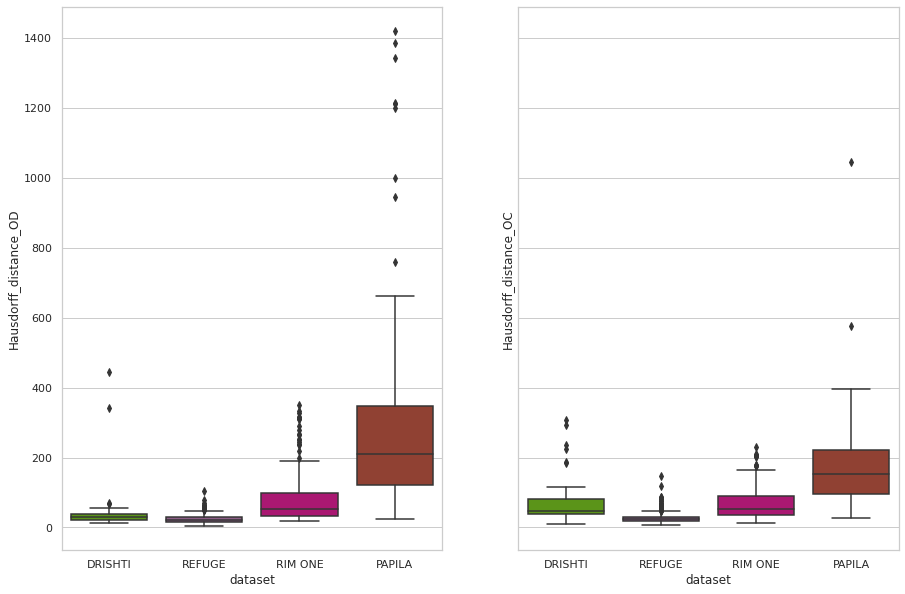

In [8]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

sns.boxplot(x='dataset',y='Hausdorff_distance_OD',data=df_MODELR, palette=pallete,ax=axes[0])
sns.boxplot(x='dataset',y='Hausdorff_distance_OC',data=df_MODELR, palette=pallete, ax=axes[1])
plt.savefig('Hausdorff_distance.jpg')

# MODELO MULTIDATASET

In [20]:
csv_drishti = 'MODELM_DRISHTI_SEGM.csv'
#csv_rimone = 'MODELM_RIMONE_SEGM.csv'
csv_refuge = 'MODELM_REFUGE_SEGM.csv'
#csv_papila = 'MODELM_PAPILA_SEGM.csv'

df_drishti = pd.read_csv(csv_drishti,index_col=0,delimiter=',')
#df_rimone = pd.read_csv(csv_rimone,index_col=0,delimiter=',')
df_refuge = pd.read_csv(csv_refuge,index_col=0,delimiter=',')
#df_papila = pd.read_csv(csv_papila,index_col=0,delimiter=',')

In [21]:
r,c = df_drishti.shape
name = []
for i in range(r):
    name.append('DRISHTI')

r,c = df_refuge.shape
name_r = []
for i in range(r):
    name_r.append('REFUGE')

# r,c = df_rimone.shape
# name_r3 = []
# for i in range(r):
#     name_r3.append('RIM ONE')

# r,c = df_papila.shape
# name_p = []
# for i in range(r):
#     name_p.append('PAPILA')

df_drishti = df_drishti.assign(dataset=name)
df_refuge =df_refuge.assign(dataset=name_r)
# df_rimone =df_rimone.assign(dataset=name_r3)
# df_papila =df_papila.assign(dataset=name_p)


In [22]:
df_MODELM = pd.concat([df_drishti,df_refuge])
#df_MODELM = pd.concat([df_MODELM,df_rimone])
#df_MODELM = pd.concat([df_MODELM,df_papila])

# ALL

In [23]:
Drow,Dcols= df_MODELD.shape
Rrow,Rcols= df_MODELR.shape
Mrow,Mcols= df_MODELM.shape

name_d = []
for i in range(Drow):
    name_d.append('Model-D')

name_r = []
for i in range(Rrow):
    name_r.append('Model-R')

name_m = []
for i in range(Mrow):
    name_m.append('Model-M')

df_MODELD =  df_MODELD.assign(model=name_d)
df_MODELR= df_MODELR.assign(model=name_r)
df_MODELM = df_MODELM.assign(model=name_m)

In [ ]:
df = pd.concat([df_MODELD,df_MODELR])
df = pd.concat([df,df_MODELM])

# Generar tabla de metricas

# others

Text(0.5, 1.0, 'OD')

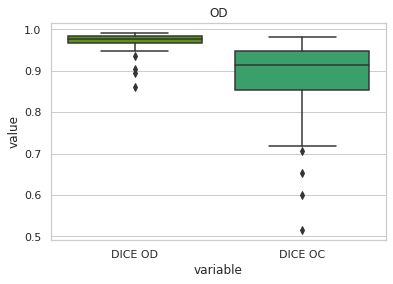

In [81]:
pallete=[sns.xkcd_rgb["leaf green"],sns.xkcd_rgb['jade green'],sns.xkcd_rgb['purplish'],sns.xkcd_rgb['muted purple'],sns.xkcd_rgb['magenta'],sns.xkcd_rgb['dark magenta'],sns.xkcd_rgb["brick"],sns.xkcd_rgb["wine"]]

sns.set_theme(style="whitegrid")
df = pd.DataFrame(data = df_drishti, columns = ['DICE OD','DICE OC'])
df_r = pd.DataFrame(data = df_refuge, columns = ['DICE OD','DICE OC'])

ax = sns.boxplot(x='variable',y="value",data=pd.melt(df), palette=pallete)
ax.set_title('OD')

In [51]:
df_drishti.mean()

/tmp/ipykernel_717822/642823795.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_drishti.mean()


Series([], dtype: float64)

In [59]:
predict_path = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelM/'
data_path = '/mnt/Almacenamiento/ODOC_segmentation/data/'
dataset_predicted = 'DRISHTI'
dataset_to_train = 'DRISHTI'# 'DRIDHTI' 


In [60]:
def get_paths(data_pred,test=True):
    predicted_img_p = []
    predicted_OD_p = []
    predicted_ODint_p = []
    predicted_OC_p = []
    gt_OD_p = []
    gt_OC_p = []

    for p in sorted(glob.glob(predict_path+ '/'+data_pred+'/OC/*')):
        predicted_OC_p.append(p)

    for p in sorted(glob.glob(predict_path+ '/'+data_pred+'/OD/*')):
        predicted_OD_p.append(p)

    for p in sorted(glob.glob(predict_path+ '/'+data_pred+'/OD_int/*')):
        predicted_ODint_p.append(p)

    if test:
        for p in sorted(glob.glob(data_path + 'images/' + data_pred + '/Test/*')):
            predicted_img_p.append(p)

        for p in sorted(glob.glob(data_path + 'OC/' + data_pred + '/Test/*')):
            gt_OC_p.append(p)

        for p in sorted(glob.glob(data_path + 'OD1/' + data_pred + '/Test/*')):
            gt_OD_p.append(p)
    else:
        for p in sorted(glob.glob(data_path + 'images/' + data_pred + '/*')):
            predicted_img_p.append(p)

        for p in sorted(glob.glob(data_path + 'OC/' + data_pred + '/*')):
            gt_OC_p.append(p)

        for p in sorted(glob.glob(data_path + 'OD1/' + data_pred + '/*')):
            gt_OD_p.append(p)

    return predicted_OC_p, predicted_OD_p,predicted_ODint_p, gt_OC_p, gt_OD_p


In [61]:
def get_dice(pred, gt):
    return f1_score(gt.flatten(), pred.flatten(),pos_label=255)

def get_precision(pred, gt):
    return precision_score(gt.flatten(), pred.flatten(),pos_label=255)

def get_recall(pred, gt):
    return recall_score(gt.flatten(), pred.flatten(),pos_label=255)
        

In [89]:
def get_metrics(predicted_OC_p, predicted_OD_p,predicted_ODint_p, gt_OC_p, gt_OD_p):
    OD_dice = []
    ODint_dice = []
    OC_dice = []
    dice_avg = []
    OD_pr = []
    ODint_pr = []
    OC_pr = []
    OD_re = []
    ODint_re = []
    OC_re = []

    for idx in range(len(predicted_OC_p)):

        if gt_OC_p[idx] != '/mnt/Almacenamiento/ODOC_segmentation/data/OC/ORIGA/359.png':
        
            pred_OC = np.array(Image.open(predicted_OC_p[idx]))
            gt_OC = np.array(Image.open(gt_OC_p[idx]))

            pred_OD = np.array(Image.open(predicted_OD_p[idx]))
            w,h = pred_OD.shape
            # pred_ODint = np.array(Image.open(predicted_ODint_p[idx]))
            # pred_ODint = resize(pred_ODint,(w,h))

            
            # pred_ODint[pred_ODint > 0.5] = 255
            # pred_ODint[pred_ODint <= 0.5] = 0

            gt_OD = np.array(Image.open(gt_OD_p[idx]))

            dice_c =get_dice(pred_OC,gt_OC)
            dice_d = get_dice(pred_OD,gt_OD)
            #dice_dint = get_dice(pred_ODint,gt_OD)
            
            OC_dice.append(dice_c)
            OD_dice.append(dice_d)
            #ODint_dice.append(dice_dint)
            dice_avg.append((dice_c + dice_d) /2)

            OC_pr.append(get_precision(pred_OC,gt_OC))
            OD_pr.append(get_precision(pred_OD,gt_OD))
            #ODint_pr.append(get_precision(pred_ODint,gt_OD))

            OC_re.append(get_recall(pred_OC,gt_OC))
            OD_re.append(get_recall(pred_OD,gt_OD))
            #ODint_re.append(get_recall(pred_ODint,gt_OD))

    return OD_dice, ODint_dice, OC_dice, dice_avg, OD_pr, ODint_pr, OC_pr, OD_re, ODint_re, OC_re



In [105]:
p_OC_D, p_OD_D, p_ODint_D, gt_OC_D, gt_OD_D = get_paths('DRISHTI',test=True)
p_OC_R, p_OD_R, p_ODint_R, gt_OC_R, gt_OD_R = get_paths('REFUGE',test=True)
p_OC_O, p_OD_O, p_ODint_O, gt_OC_O, gt_OD_O = get_paths('ORIGA',test=False)
p_OC_R3, p_OD_R3, p_ODint_R3, gt_OC_R3, gt_OD_R3 = get_paths('RIM_ONE_R3',test=False)

In [91]:
OD_dice_D, ODint_dice_D, OC_dice_D, AVG_dice_D, OD_pr_D, ODint_pr_D, OC_pr_D, OD_re_D, ODint_re_D, OC_re_D = get_metrics(p_OC_D, p_OD_D, p_ODint_D, gt_OC_D, gt_OD_D)


In [ ]:
OD_dice_R, ODint_dice_R, OC_dice_R, AVG_dice_R, OD_pr_R, ODint_pr_R, OC_pr_R, OD_re_R, ODint_re_R, OC_re_R = get_metrics(p_OC_R, p_OD_R, p_ODint_R, gt_OC_R, gt_OD_R)


In [92]:
mean_OD_D = np.mean(OD_dice_D)
std_OD_D = np.std(OD_dice_D)
#mean_ODint_D = np.mean(ODint_dice_D)
#std_ODint_D = np.std(ODint_dice_D)
mean_OC_D = np.mean(OC_dice_D)
std_OC_D = np.std(OC_dice_D)

print('DRISHTI: mean OD: ', mean_OD_D , std_OD_D, ' OC: ', mean_OC_D, std_OC_D )

DRISHTI: mean OD:  0.9430113714346396 0.024653589420938864  OC:  0.8301169752799916 0.11960911689401364


In [101]:
mean_OD_R = np.mean(OD_dice_R)
std_OD_R = np.std(OD_dice_R)
#mean_ODint_D = np.mean(ODint_dice_D)
#std_ODint_D = np.std(ODint_dice_D)
mean_OC_R = np.mean(OC_dice_R)
std_OC_R = np.std(OC_dice_R)

print('REFUGE: mean OD: ', mean_OD_R , std_OD_R, ' OC: ', mean_OC_R, std_OC_R )

REFUGE: mean OD:  0.9139865864292588 0.04332301678388821  OC:  0.8053970385105989 0.10515722977589338


In [93]:

OD_dice_O, ODint_dice_O, OC_dice_O, AVG_dice_O, OD_pr_O, ODint_pr_O, OC_pr_O, OD_re_O, ODint_re_O, OC_re_O = get_metrics(p_OC_O, p_OD_O, p_ODint_O, gt_OC_O, gt_OD_O )
OD_dice_R3, ODint_dice_R3, OC_dice_R3, AVG_dice_R3, OD_pr_R3, ODint_pr_R3, OC_pr_R3, OD_re_R3, ODint_re_R3, OC_re_R3 = get_metrics(p_OC_R3, p_OD_R3, p_ODint_R3, gt_OC_R3, gt_OD_R3)





/home/euge/anaconda3/envs/ODOC_seg/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
mean_OD_O = np.mean(OD_dice_O)
std_OD_O = np.std(OD_dice_O)
#mean_ODint_D = np.mean(ODint_dice_D)
#std_ODint_D = np.std(ODint_dice_D)
mean_OC_O = np.mean(OC_dice_O)
std_OC_O = np.std(OC_dice_O)

print('ORIGA: mean OD: ', mean_OD_O , std_OD_O, ' OC: ', mean_OC_O, std_OC_O )

ORIGA: mean OD:  0.9018277545942535 0.07388945461766576  OC:  0.7916544283018996 0.13175196946726345


In [104]:
mean_OD_R3 = np.mean(OD_dice_R3)
std_OD_R3 = np.std(OD_dice_R3)
#mean_ODint_D = np.mean(ODint_dice_D)
#std_ODint_D = np.std(ODint_dice_D)
mean_OC_R3 = np.mean(OC_dice_R3)
std_OC_R3 = np.std(OC_dice_R3)

print('DRISHTI: mean OD: ', mean_OD_R3 , std_OD_R3, ' OC: ', mean_OC_R3, std_OC_R3 )

DRISHTI: mean OD:  0.8473379382737125 0.13394194102452797  OC:  0.6926784248327873 0.19439616926039477


In [94]:
DRISHTI_dice = {'avg_DICE': AVG_dice_D, 'OC_DICE': OC_dice_D, 'OD_DICE': OD_dice_D, 'PR OD':OD_pr_D, 'PR OC':OC_pr_D, 'RECALL OD':OD_re_D, 'RECALL OC':OC_re_D}
df_DRISHTI = pd.DataFrame(data=DRISHTI_dice)

REFUGE_dice = {'avg_DICE': AVG_dice_R, 'OC_DICE': OC_dice_R, 'OD_DICE': OD_dice_R, 'PR OD':OD_pr_R, 'PR OC':OC_pr_R, 'RECALL OD':OD_re_R, 'RECALL OC':OC_re_R}
df_REFUGE = pd.DataFrame(data=REFUGE_dice)

ORIGA_dice = {'avg_DICE': AVG_dice_O, 'OC_DICE': OC_dice_O, 'OD_DICE': OD_dice_O, 'PR OD':OD_pr_O, 'PR OC':OC_pr_O, 'RECALL OD':OD_re_O, 'RECALL OC':OC_re_O}
df_ORIGA = pd.DataFrame(data=ORIGA_dice)

RIMONE3_dice = {'avg_DICE': AVG_dice_R3, 'OC_DICE': OC_dice_R3, 'OD_DICE': OD_dice_R3, 'PR OD':OD_pr_R3, 'PR OC':OC_pr_R3, 'RECALL OD':OD_re_R3, 'RECALL OC':OC_re_R3}
df_RIMONE = pd.DataFrame(data=RIMONE3_dice)



df = {'DRISHTI':DRISHTI_dice, 'REFUGE': REFUGE_dice, 'RIM_ONE_R3': RIMONE3_dice}

In [142]:
df_DRISHTI.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of     avg_DICE   OC_DICE   OD_DICE     PR OD     PR OC  RECALL OD  RECALL OC
0   0.912701  0.886584  0.938818  0.890483  0.987579   0.992701   0.804330
1   0.842866  0.707605  0.978127  0.962238  1.000000   0.994550   0.547514
2   0.599336  0.357295  0.841377  0.989924  1.000000   0.731595   0.217504
3   0.778223  0.627187  0.929259  0.988563  1.000000   0.876667   0.456862
4   0.807846  0.667081  0.948610  0.918538  0.665219   0.980718   0.668954
5   0.894655  0.857744  0.931566  0.997224  0.993155   0.874020   0.754828
6   0.800166  0.861616  0.738716  0.604823  0.784323   0.948745   0.955809
7   0.857182  0.774945  0.939420  0.999969  1.000000   0.885785   0.632580
8   0.936723  0.892731  0.980715  0.979545  0.999206   0.981889   0.806762
9   0.890325  0.819085  0.961565  0.937781  0.953255   0.986586   0.718024
10  0.921063  0.911220  0.930906  0.884527  0.948050   0.982419   0.877145
11  0.459034  0.105583  0.812485  0.9

Text(0.5, 1.0, 'avg')

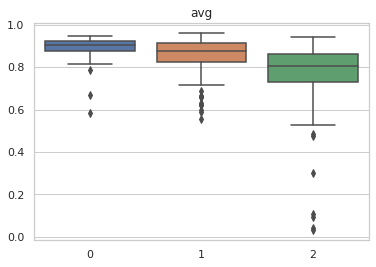

In [95]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=(DRISHTI_dice['avg_DICE'],REFUGE_dice['avg_DICE'],RIMONE3_dice['avg_DICE']))
ax.set_title('avg')

Text(0.5, 1.0, 'DRISHTI')

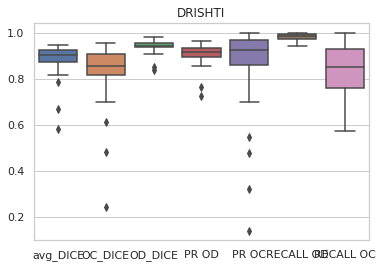

In [96]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_DRISHTI)
ax.set_title('DRISHTI')

Text(0.5, 1.0, 'REFUGE')

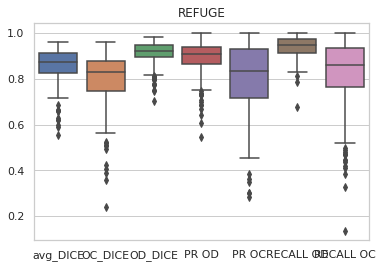

In [97]:

sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_REFUGE)
ax.set_title('REFUGE')

Text(0.5, 1.0, 'ORIGA')

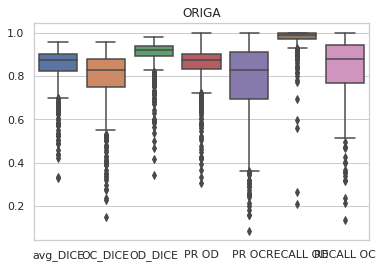

In [98]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_ORIGA)
ax.set_title('ORIGA')

In [99]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df)
ax.set_title('RIMEONE')

KeyError: 0